In [50]:
# Load the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.io import loadmat
from sklearn import metrics
from pylab import *
import sklearn.preprocessing

In [51]:
# Load dev data
d = loadmat('data_ivector_embeddings.mat') # load the data
data2 = d['devIVs']

# define X 
inputs = data2.transpose()

# define Y
labels = d['labels']
labels = labels[:,0]
labels

# target names = categories
target_names = ['audiobooks', 'broadcast_interview', 'child', 'clinical', 'court', 'maptask', 'meeting', 'restaurant', 'socio_field', 'socio_lab', 'webvideo']

# add names of files
list_file_names = ['DH_000'+str(i) for i in range(1,10)]
list_file_names += ['DH_00'+str(i) for i in range(10,100)]
list_file_names += ['DH_0'+str(i) for i in range(100,193)]

d['files'] = list_file_names

In [52]:
#load eval data
labels_eval = pd.read_csv("domain_list_eval.csv") 
labels_eval.shape

eval_data = []

with open('dev_eval_dihard_ivector.txt', 'r') as f:
    for i in f.readlines():
        txt = i.split()
        if txt[0][0] == 'e':
            eval_data.append(txt)

eval_data.sort()
name_files_eval = [i[0][5:] for i in eval_data]
eval_data = [i[1:] for i in eval_data]


df_eval = pd.DataFrame(list(zip(eval_data,labels_eval['labels'], name_files_eval)),columns = ["data","label","files"])
# df_eval = df_eval.sample(frac=1)

In [53]:
# create dataframe which contains the data with the labels of dev data
df = pd.DataFrame(list(zip(inputs,labels, d['files'])),columns = ["data","label", 'files'])
# df = df.sample(frac=1) # shuffle the data
df
# print head of dataframe
#df.shape

data  label    files
0    [-0.8711261, -0.01523707, -1.312261, -1.124552...      1  DH_0001
1    [1.208957, -0.6493585, -1.5397, 0.01195502, -2...      1  DH_0002
2    [2.979908, 0.7329904, -1.914249, -0.07597715, ...      1  DH_0003
3    [-0.5403174, 0.5555854, -1.923427, -0.08261859...      1  DH_0004
4    [-0.08468243, 0.8757551, -1.595554, 0.2286839,...      1  DH_0005
..                                                 ...    ...      ...
187  [-0.126056, -1.198096, -0.8462679, 0.08122081,...      2  DH_0188
188  [0.7519389, -0.5359707, 1.670133, -0.6349728, ...      2  DH_0189
189  [1.120508, -0.4922058, -0.5848295, -0.9435504,...      2  DH_0190
190  [0.5005113, -0.9281158, 0.806973, -0.7544474, ...      2  DH_0191
191  [-0.09350562, -0.143597, 1.194559, -0.9095662,...      2  DH_0192

[192 rows x 3 columns]

In [54]:
# Define X and Y variables
X = list(df['data'])
Y = df['label']
Z = df['files']

In [55]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# len(X_train)  # 144
# len(X_test)  # 48
# len(y_train)  # 144
# len(y_test)  # 4
# TOTAL OF 192 files

{1: 0.8333333333333334, 2: 0.625, 3: 0.6041666666666666, 4: 0.5833333333333334, 5: 0.5833333333333334, 6: 0.6041666666666666, 7: 0.5625, 8: 0.5625, 9: 0.5416666666666666, 10: 0.5416666666666666, 11: 0.5, 12: 0.4791666666666667, 13: 0.5, 14: 0.5, 15: 0.5208333333333334, 16: 0.5208333333333334, 17: 0.5208333333333334, 18: 0.5208333333333334, 19: 0.5208333333333334, 20: 0.5416666666666666, 21: 0.5208333333333334, 22: 0.5208333333333334, 23: 0.5416666666666666, 24: 0.5416666666666666, 25: 0.5416666666666666, 26: 0.5625, 27: 0.5833333333333334, 28: 0.5625, 29: 0.5208333333333334, 30: 0.5208333333333334, 31: 0.5208333333333334, 32: 0.5208333333333334, 33: 0.5416666666666666, 34: 0.5625, 35: 0.5416666666666666, 36: 0.5208333333333334, 37: 0.5208333333333334, 38: 0.5208333333333334, 39: 0.5208333333333334}

Max neighbor = 1 with accuracy of :  0.8333333333333334


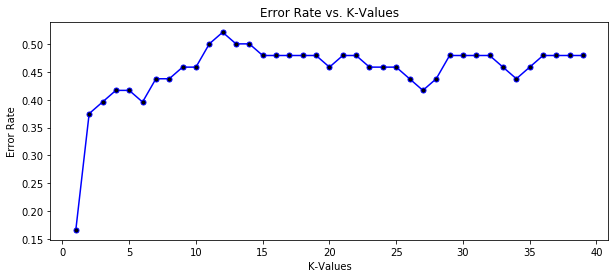

In [56]:
import operator

error_rate = []
scores = {}
scores_list = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    scores[i] = metrics.accuracy_score(y_test, pred_i)
    error_rate.append(np.mean(pred_i != y_test))
    
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='solid', marker='.', markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

print(scores)
max_n = max(scores.items(), key=operator.itemgetter(1))[0]
print('\nMax neighbor = '+str(max_n)+' with accuracy of : ' , max(scores.values()))
# We can see that the best model is with 3 n_neighbors as parameters

In [57]:
# Create the model with optimal value K = 2
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [59]:
knn.score(X_test, y_test)

0.8333333333333334

In [61]:
# PREDICTION WITH THE TRAINING DATA
y_pred_train = knn.predict(X)

# display the y_pred and y_test label
for v in zip(Y, y_pred_train, Z):
    print (*v)

# create dataframe with information 
df_2 = pd.DataFrame()
df_2['dev_labels'] = Y
df_2['dev_labels_pred'] = y_pred_train
df_2['names'] = Z
df_2.sort_values('dev_labels_pred')
df_2.to_csv('dev_knn_filesivectors.csv')

1 1 DH_0001
1 1 DH_0002
1 1 DH_0003
1 1 DH_0004
1 9 DH_0005
1 1 DH_0006
1 1 DH_0007
1 1 DH_0008
1 1 DH_0009
1 1 DH_0010
1 1 DH_0011
1 2 DH_0012
3 3 DH_0013
3 3 DH_0014
3 3 DH_0015
3 3 DH_0016
3 3 DH_0017
3 3 DH_0018
3 3 DH_0019
3 3 DH_0020
3 3 DH_0021
3 3 DH_0022
3 3 DH_0023
3 3 DH_0024
3 3 DH_0025
3 3 DH_0026
3 3 DH_0027
3 3 DH_0028
3 3 DH_0029
3 3 DH_0030
3 3 DH_0031
3 3 DH_0032
3 3 DH_0033
3 3 DH_0034
3 3 DH_0035
8 8 DH_0036
8 8 DH_0037
8 8 DH_0038
8 8 DH_0039
8 8 DH_0040
8 8 DH_0041
8 8 DH_0042
8 8 DH_0043
8 8 DH_0044
8 8 DH_0045
8 8 DH_0046
8 8 DH_0047
4 4 DH_0048
4 4 DH_0049
4 4 DH_0050
4 4 DH_0051
4 4 DH_0052
4 4 DH_0053
4 4 DH_0054
4 4 DH_0055
4 4 DH_0056
4 4 DH_0057
4 4 DH_0058
4 4 DH_0059
4 4 DH_0060
4 4 DH_0061
4 4 DH_0062
4 4 DH_0063
4 4 DH_0064
4 4 DH_0065
4 4 DH_0066
4 4 DH_0067
4 4 DH_0068
4 4 DH_0069
4 4 DH_0070
4 4 DH_0071
5 5 DH_0072
5 5 DH_0073
5 5 DH_0074
5 5 DH_0075
5 5 DH_0076
5 5 DH_0077
5 5 DH_0078
5 5 DH_0079
5 5 DH_0080
5 5 DH_0081
5 5 DH_0082
5 5 DH_0083
6 6 

In [62]:
# display accuracy level of the prediction of train data
accuracy = metrics.accuracy_score(Y, y_pred_train)
accuracy

0.9583333333333334

In [63]:
# Print out classification report
print(classification_report(Y, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.89      0.67      0.76        12
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        23
           7       0.93      0.93      0.93        14
           8       0.71      1.00      0.83        12
           9       0.92      1.00      0.96        12
          10       1.00      1.00      1.00        16
          11       1.00      0.97      0.98        32

    accuracy                           0.96       192
   macro avg       0.95      0.95      0.94       192
weighted avg       0.96      0.96      0.96       192



In [64]:
# Print out confusion matrix
cmat = confusion_matrix(Y, y_pred_train)
print(cmat)

[[10  1  0  0  0  0  0  0  1  0  0]
 [ 0  8  0  0  0  0  1  3  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  1  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  1  0  0 31]]


In [65]:
# Percentage table

print(cmat / cmat.astype(np.float).sum(axis=0))

[[1.         0.11111111 0.         0.         0.         0.
  0.         0.         0.07692308 0.         0.        ]
 [0.         0.88888889 0.         0.         0.         0.
  0.07142857 0.17647059 0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.92857143 0.05882353 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.70588235 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

In [66]:
# EVALUATION DATA PREDICTION

X_eval = list(df_eval['data'])
Y_eval = df_eval['label']
Z_eval = df_eval['files']
y_pred_eval = knn.predict(X_eval)

# display the y_pred and y_test label
for v in zip(Y_eval, y_pred_eval, Z_eval):
    print (*v)

# create dataframe with information 
df_3 = pd.DataFrame()
df_3['eval_labels'] = Y_eval
df_3['eval_labels_pred'] = y_pred_eval
df_3['names'] = Z_eval
df_3.sort_values('eval_labels_pred')
df_3.to_csv('eval_knn_filesivectors.csv')

9 8 DH_0001
8 8 DH_0002
4 4 DH_0003
8 8 DH_0004
10 10 DH_0005
6 6 DH_0006
6 6 DH_0007
11 11 DH_0008
11 8 DH_0009
1 9 DH_0010
8 8 DH_0011
6 6 DH_0012
8 8 DH_0013
6 6 DH_0014
3 3 DH_0015
1 8 DH_0016
4 4 DH_0017
6 6 DH_0018
2 5 DH_0019
4 4 DH_0020
11 3 DH_0021
3 3 DH_0022
6 6 DH_0023
11 8 DH_0024
10 10 DH_0025
11 9 DH_0026
11 8 DH_0027
6 6 DH_0028
5 5 DH_0029
6 6 DH_0030
4 4 DH_0031
2 7 DH_0032
6 6 DH_0033
3 3 DH_0034
6 6 DH_0035
11 8 DH_0036
1 11 DH_0037
3 8 DH_0038
6 6 DH_0039
9 7 DH_0040
11 4 DH_0041
3 3 DH_0042
10 10 DH_0043
5 5 DH_0044
4 4 DH_0045
8 8 DH_0046
4 4 DH_0047
8 8 DH_0048
2 8 DH_0049
10 7 DH_0050
1 3 DH_0051
9 7 DH_0052
5 5 DH_0053
4 4 DH_0054
11 11 DH_0055
11 11 DH_0056
5 5 DH_0057
6 6 DH_0058
3 8 DH_0059
10 10 DH_0060
3 8 DH_0061
8 8 DH_0062
1 5 DH_0063
2 8 DH_0064
10 10 DH_0065
5 5 DH_0066
3 3 DH_0067
11 3 DH_0068
9 9 DH_0069
5 5 DH_0070
9 8 DH_0071
10 7 DH_0072
8 8 DH_0073
2 8 DH_0074
4 4 DH_0075
4 4 DH_0076
2 8 DH_0077
6 6 DH_0078
10 11 DH_0079
1 8 DH_0080
3 3 DH_0081

/home/macaire/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/macaire/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [67]:
# display accuracy level of the prediction of train data
accuracy = metrics.accuracy_score(Y_eval, y_pred_eval)
accuracy

0.6288659793814433

In [68]:
# Print out classification report
print(classification_report(Y_eval, y_pred_eval))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12
           3       0.72      0.78      0.75        23
           4       0.86      1.00      0.92        24
           5       0.75      1.00      0.86        12
           6       1.00      1.00      1.00        19
           7       0.58      1.00      0.73        11
           8       0.24      1.00      0.39        12
           9       0.43      0.27      0.33        22
          10       1.00      0.75      0.86        12
          11       0.79      0.31      0.45        35

    accuracy                           0.63       194
   macro avg       0.58      0.65      0.57       194
weighted avg       0.64      0.63      0.59       194



/home/macaire/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
# Print out confusion matrix
cmat_1 = confusion_matrix(Y_eval, y_pred_eval)
print(cmat_1)

[[ 0  0  1  1  3  0  0  3  2  0  2]
 [ 0  0  0  0  1  0  1  9  1  0  0]
 [ 0  0 18  0  0  0  0  5  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  1  2  0  0  5  8  6  0  0]
 [ 0  0  0  0  0  0  2  0  0  9  1]
 [ 0  0  5  1  0  0  0 13  5  0 11]]


In [72]:
# Percentage table

print(cmat_1 / cmat_1.astype(np.float).sum(axis=0))

[[       nan        nan 0.04       0.03571429 0.1875     0.
  0.         0.06       0.14285714 0.         0.14285714]
 [       nan        nan 0.         0.         0.0625     0.
  0.05263158 0.18       0.07142857 0.         0.        ]
 [       nan        nan 0.72       0.         0.         0.
  0.         0.1        0.         0.         0.        ]
 [       nan        nan 0.         0.85714286 0.         0.
  0.         0.         0.         0.         0.        ]
 [       nan        nan 0.         0.         0.75       0.
  0.         0.         0.         0.         0.        ]
 [       nan        nan 0.         0.         0.         1.
  0.         0.         0.         0.         0.        ]
 [       nan        nan 0.         0.         0.         0.
  0.57894737 0.         0.         0.         0.        ]
 [       nan        nan 0.         0.         0.         0.
  0.         0.24       0.         0.         0.        ]
 [       nan        nan 0.04       0.07142857 0.        

/home/macaire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 194...
Mean value of sigma: 0.393852


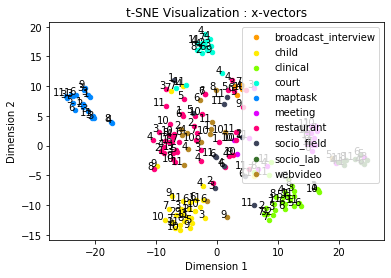

In [27]:
#tsne visualization
def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P

def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y

def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            # print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y


print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")

# data = loadmat('data_xvector_embeddings.mat')
colors=["#FF2D00", "#FF9B00", "#FFEC00", "#80FF00", "#00FFD8", "#0087FF", "#E000FF", "#FF0078", "#3C435A", "#366F29", "#B58724"]

# inputs = X # change there to see train data
labels_pred=y_pred

X_2=sklearn.preprocessing.normalize(eval_data, norm='l2', axis=0)
Y_2 = tsne(X_2, 2, 20, 20.0)

f, ax = plt.subplots(1)
for i in np.unique(labels_pred):
    mask = labels_pred == i
    plt.scatter(Y_2[mask, 0], Y_2[mask, 1], 20, label=target_names[i-1], c=colors[i-1])

for label, x, y in zip(labels, Y_2[:, 0], Y_2[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-0.5, 0.5),
        textcoords='offset points', ha='right')


ax.legend()
plt.title('t-SNE Visualization : x-vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

w = 1519
h = 846

f.set_size_inches(w/96,h/96)
f.savefig('x_vectorsKNNtsne_eval.png', dpi=96)